In [3]:
import pandas as pd
import numpy as np
import os

from pandas.plotting import autocorrelation_plot

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [4]:
FLD = "/home/nur/projects/analysis/dynamic_price/data/dynamic_classic_price"
ZX_df = pd.read_csv(os.path.join(FLD, 'ZX10208_agr.csv'))
ZX_df.head(2)

,dates,SKU,price_per_sku,num_purchases
0,2018-04-20,59567,169.19,3
1,2018-04-24,59567,171.71,3


In [5]:
ZX_df['dates'] = pd.to_datetime(ZX_df.dates)

In [6]:
pivot_t = ZX_df.pivot_table(index='dates',columns='SKU', values='price_per_sku')

<AxesSubplot:xlabel='dates'>

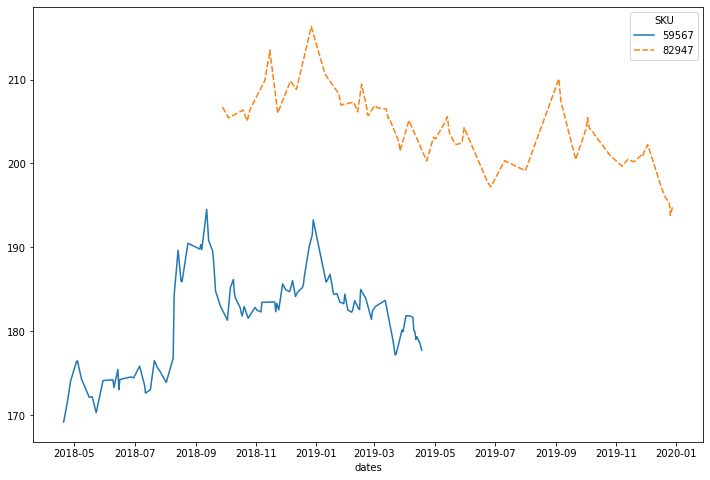

In [7]:
plt.figure(figsize=(12,8))
sns.lineplot(data =pivot_t)

In [8]:
ZX_df['price_per_sku'] = ZX_df.groupby('SKU').price_per_sku.ffill()

In [9]:
pivot_t = ZX_df.pivot_table(index='dates',columns='SKU', values='price_per_sku')

<AxesSubplot:xlabel='dates'>

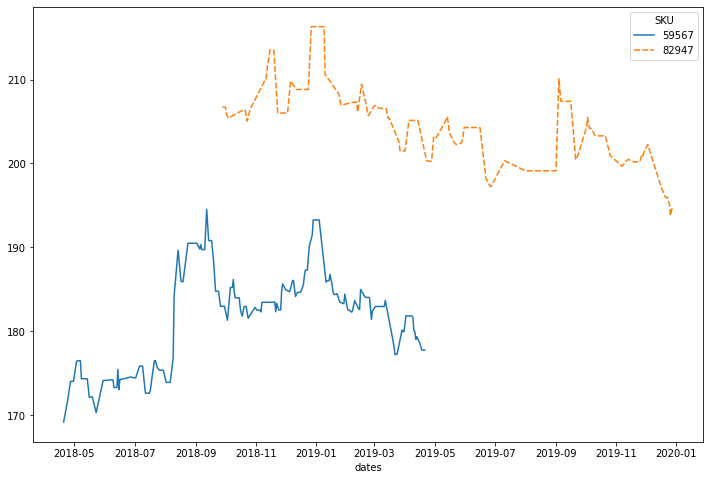

In [10]:
plt.figure(figsize=(12,8))
sns.lineplot(data =pivot_t)

In [11]:
df_59567 = ZX_df[ZX_df.SKU == 59567]

In [12]:
df_59567.dates.describe()

/home/nur/projects/analysis/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                     156
unique                    156
top       2018-12-21 00:00:00
freq                        1
first     2018-04-20 00:00:00
last      2019-04-21 00:00:00
Name: dates, dtype: object

In [13]:
train_df = df_59567[df_59567.dates <= pd.to_datetime('2019-04-01')]
test_df = df_59567[df_59567.dates > pd.to_datetime('2019-04-01')]

In [14]:
train_df.shape

(145, 4)

In [15]:
test_df.shape

(11, 4)

In [16]:
train_df

,dates,SKU,price_per_sku,num_purchases
0,2018-04-20,59567,169.19,3
1,2018-04-24,59567,171.71,3
2,2018-04-27,59567,174.04,3
3,2018-04-30,59567,174.04,1
4,2018-05-03,59567,176.38,2
...,...,...,...,...
184,2019-03-23,59567,177.28,3
185,2019-03-24,59567,177.28,1
188,2019-03-29,59567,180.15,1
189,2019-03-30,59567,179.96,1


In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [ ]:
plt.figure(figsize=(12,8))
autocorrelation_plot(df_59567.price_per_sku.values)

In [ ]:
#1 Autoregression
AR = AutoReg(train_df.price_per_sku.values, lags=20)
AR_model = AR.fit()

In [ ]:
AR_model.params

In [ ]:
AR_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1, 
                 dynamic=False)

In [ ]:
test_df['AR_model_prediction'] = AR_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1, 
                 dynamic=False)

In [ ]:
test_df

In [ ]:
# Moving Avarage
MA = ARIMA(train_df.price_per_sku.values, order=(0,0,20))
MA_model = MA.fit()

In [ ]:
MA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

In [ ]:
test_df['MA_model_prediction'] = MA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

In [ ]:
test_df

In [ ]:
# Autoregressive moving average(ARMA)
ARMA = ARIMA(train_df.price_per_sku.values, order=(1,0,1))
ARMA_model = ARMA.fit()

In [ ]:
ARMA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

In [ ]:
test_df['ARMA_model_prediction'] = ARMA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

In [ ]:
# Autoregressive Integrated Moving Average
ARIMA_ = ARIMA(train_df.price_per_sku.values, order=(20,1,20))
ARIMA_model = ARIMA_.fit()

In [ ]:
ARIMA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

In [ ]:
test_df['ARIMA_model_prediction'] = ARIMA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

In [ ]:
test_df.head(2)

In [ ]:
# Seasonal Autoregressive Integrated Moving-Average 
SARIMA = SARIMAX(train_df.price_per_sku.values, order=(20,1,20), seasonal= (0,0,0,0))
SARIMA_model = SARIMA.fit()

In [ ]:
SARIMA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

In [ ]:
test_df['SARIMA_model_prediction'] = SARIMA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

In [ ]:
# Simple Exponential Smoothing
SES = SimpleExpSmoothing(train_df.price_per_sku.values)
SES_model = SES.fit()

In [ ]:
SES_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

In [ ]:
test_df['SES_model_prediction'] = SES_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

In [ ]:
# VAR
# VARMA
# VARMAX

In [ ]:
import torch
from torch import nn
from torch.autograd import Variable as V
from torch import optim
import torchvision as tv
import torchvision.transforms as tf

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [ ]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_df.price_per_sku.values .reshape(-1, 1))

In [ ]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)

In [ ]:
train_data_normalized

In [ ]:
def create_inout_sequences(input_data, tw=11):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        right_idx = i+tw
        train_seq = input_data[i:right_idx]
        train_label = input_data[right_idx:right_idx+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [ ]:
train_inout_seq = create_inout_sequences(train_data_normalized, tw=11)

In [ ]:
train_inout_seq[:3]

In [ ]:
epochs = 80

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%10 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

In [ ]:
test_inputs = train_data_normalized[-11:].tolist()

In [ ]:
model.eval()

for i in range(11):
    seq = torch.FloatTensor(test_inputs[-11:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())

In [ ]:
test_inputs[11:]

In [ ]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[11:] ).reshape(-1, 1))
print(actual_predictions)

In [ ]:
plt.figure(figsize=(12,8))
x = np.arange(145, 156, 1)
plt.autoscale(axis='x', tight=True)
plt.plot(df_59567.price_per_sku.values)
plt.plot(x,actual_predictions)
plt.show()

<img src = https://miro.medium.com/max/1131/0*ufWnnvTA9AkjKrfI>

In [ ]:
# Autoregressive Integrated Moving Average with boundaries
ARIMA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)


In [ ]:
ARIMA_model.get_forecast(11).conf_int(0.05)

In [ ]:
test_df['ARIMA_low_boundary'] = ARIMA_model.get_forecast(11).conf_int(0.05)[:,0]
test_df['ARIMA_high_boundary'] = ARIMA_model.get_forecast(11).conf_int(0.05)[:,1]

In [ ]:
test_df.columns

In [ ]:
col_list = ['dates','price_per_sku','AR_model_prediction',
       'MA_model_prediction', 'ARMA_model_prediction',
       'ARIMA_model_prediction', 'SARIMA_model_prediction',
       'SES_model_prediction', 'ARIMA_low_boundary', 'ARIMA_high_boundary']

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=test_df[col_list].set_index('dates'), dashes=False,linewidth = 3)

In [ ]:
pred_columns = ['AR_model_prediction',
       'MA_model_prediction', 'ARMA_model_prediction',
       'ARIMA_model_prediction', 'SARIMA_model_prediction',
       'SES_model_prediction']

In [ ]:
test_df['mean_predicted_price'] = test_df[pred_columns].mean(axis=1)

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
tss = TimeSeriesSplit(n_splits = 12)


In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=test_df[['dates', 'price_per_sku', 'mean_predicted_price']].set_index('dates'), dashes=False,linewidth = 3)

In [ ]:
from prophet import Prophet

In [ ]:
prophet = Prophet()

In [ ]:
prophet.fit(train_df[['dates', 'price_per_sku']].rename(columns={'dates':'ds','price_per_sku':'y'}))

In [ ]:
pred_df = prophet.predict(test_df[['dates']].rename(columns={'dates':'ds'}))

In [ ]:
pred_df.head()

In [ ]:
prophet.plot(pred_df)

In [ ]:
prophet.plot_components(pred_df)
plt.show()

In [ ]:
test_df['prophet_model_prediction'] = pred_df['yhat'].values

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=test_df[['dates', 'price_per_sku', 'prophet_model_prediction']].set_index('dates'), 
             dashes=False, linewidth = 3)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
GBR = GradientBoostingRegressor()

In [ ]:
from xgboost.sklearn import XGBRegressor
from functools import partial

Quantile:
$$C(x) = \left\{\begin{array}{cc}(\alpha-1)|x-q| & \mbox{if }x<q \\ \alpha|x-q| & \mbox{if }x\geq q \end{array}\right. $$

Split condition:

$$\mathcal{L}_{\mbox{ split}} = \frac{\left(\sum\limits_{i \in I_L}g_j \right)^2}{\sum\limits_{i \in I_L}h_j+\lambda}+\frac{\left(\sum\limits_{i \in I_R}g_j\right)^2}{\sum\limits_{i \in I_R}h_j+\lambda}-\frac{\left(\sum\limits_{i \in I}g_j\right)^2}{\sum\limits_{i \in I}h_j+\lambda}~~~~\mbox{for } I_{L} \cup I_{R} = I $$

In [ ]:
#@title XGBQuantile Class
class XGBQuantile(XGBRegressor):
    def __init__(self,quant_alpha=0.95,quant_delta = 1.0,quant_thres=1.0,quant_var =1.0,base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
                n_jobs=1, nthread=None, objective='reg:linear', random_state=0,reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,silent=True, subsample=1):
        self.quant_alpha = quant_alpha
        self.quant_delta = quant_delta
        self.quant_thres = quant_thres
        self.quant_var = quant_var
    
        super().__init__(base_score=base_score, booster=booster, colsample_bylevel=colsample_bylevel,
           colsample_bytree=colsample_bytree, gamma=gamma, learning_rate=learning_rate, max_delta_step=max_delta_step,
           max_depth=max_depth, min_child_weight=min_child_weight, missing=missing, n_estimators=n_estimators,
           n_jobs= n_jobs, nthread=nthread, objective=objective, random_state=random_state,
           reg_alpha=reg_alpha, reg_lambda=reg_lambda, scale_pos_weight=scale_pos_weight, seed=seed,
           silent=silent, subsample=subsample)

        self.test = None
  
    def fit(self, X, y):
        super().set_params(objective=partial(XGBQuantile.quantile_loss,alpha = self.quant_alpha,delta = self.quant_delta,threshold = self.quant_thres,var = self.quant_var) )
        super().fit(X,y)
        return self
  
    def predict(self,X):
        return super().predict(X)
  
    def score(self, X, y):
        y_pred = super().predict(X)
        score = XGBQuantile.quantile_score(y, y_pred, self.quant_alpha)
        score = 1./score
        return score
      
    @staticmethod
    def quantile_loss(y_true,y_pred,alpha,delta,threshold,var):
        x = y_true - y_pred
        grad = (x<(alpha-1.0)*delta)*(1.0-alpha)-  ((x>=(alpha-1.0)*delta)& (x<alpha*delta) )*x/delta-alpha*(x>alpha*delta)
        hess = ((x>=(alpha-1.0)*delta)& (x<alpha*delta) )/delta 

        grad = (np.abs(x)<threshold )*grad - (np.abs(x)>=threshold )*(2*np.random.randint(2, size=len(y_true)) -1.0)*var
        hess = (np.abs(x)<threshold )*hess + (np.abs(x)>=threshold )
        return grad, hess
  
    @staticmethod
    def original_quantile_loss(y_true,y_pred,alpha,delta):
        x = y_true - y_pred
        grad = (x<(alpha-1.0)*delta)*(1.0-alpha)-((x>=(alpha-1.0)*delta)& (x<alpha*delta) )*x/delta-alpha*(x>alpha*delta)
        hess = ((x>=(alpha-1.0)*delta)& (x<alpha*delta) )/delta 
        return grad,hess

  
    @staticmethod
    def quantile_score(y_true, y_pred, alpha):
        score = XGBQuantile.quantile_cost(x=y_true-y_pred,alpha=alpha)
        score = np.sum(score)
        return score
  
    @staticmethod
    def quantile_cost(x, alpha):
        return (alpha-1.0)*x*(x<0)+alpha*x*(x>=0)
  
    @staticmethod
    def get_split_gain(gradient,hessian,l=1):
        split_gain = list()
        for i in range(gradient.shape[0]):
            split_gain.append(np.sum(gradient[:i])**2/(np.sum(hessian[:i])+l)+np.sum(gradient[i:])**2/(np.sum(hessian[i:])+l)-np.sum(gradient)**2/(np.sum(hessian)+l) )
    
        return np.array(split_gain)
